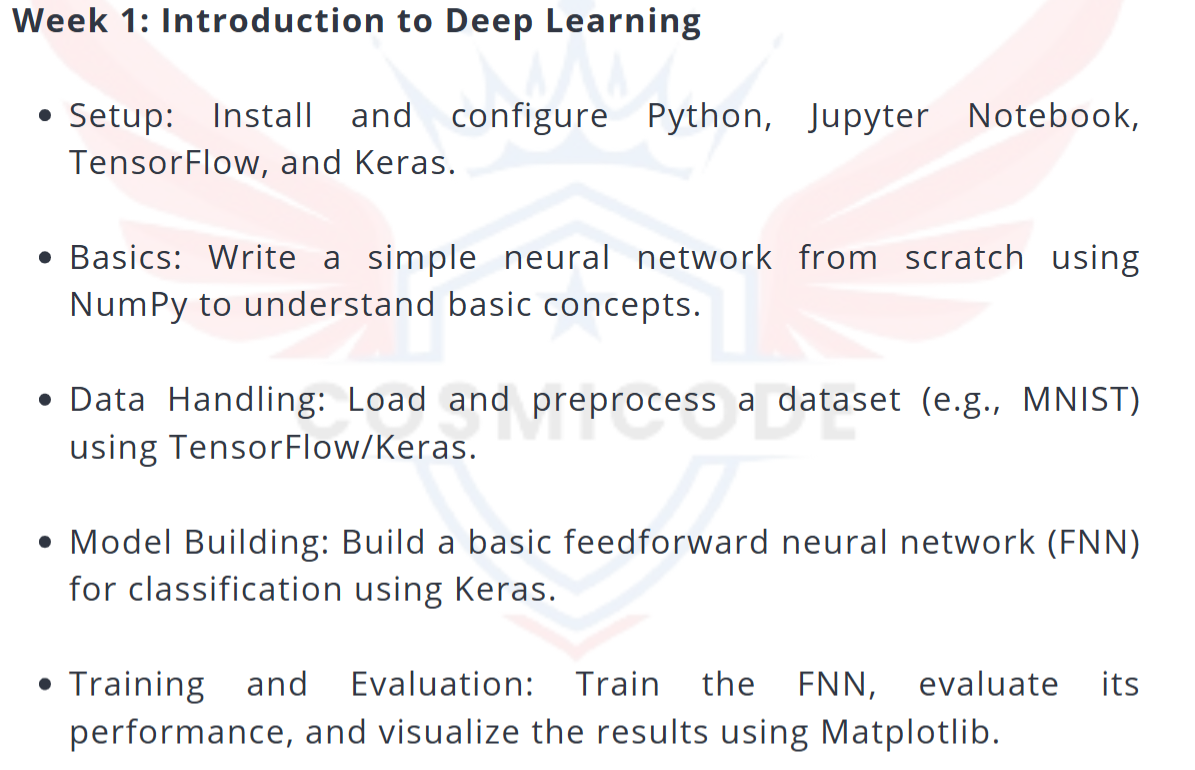

In [20]:
# task 1: just installation

import sys
import tensorflow as tf
import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


print("Python version:", sys.version)
print("TensorFlow version:", tf.__version__)
print("Keras version:", keras.__version__)
print("NumPy version:", np.__version__)
print("Pandas version:", pd.__version__)

Python version: 3.12.4 (tags/v3.12.4:8e8a4ba, Jun  6 2024, 19:30:16) [MSC v.1940 64 bit (AMD64)]
TensorFlow version: 2.17.0
Keras version: 3.6.0
NumPy version: 1.26.4
Pandas version: 2.2.2


In [14]:
# task 2: neural network in numpy


# Step 1: Neuron class
class Neuron:
    def __init__(self, num_inputs):
        self.weights = np.random.random(num_inputs)  # Random weights for each input
        self.bias = np.random.random()               # One bias value
    
    def activate(self, inputs):
        total = np.dot(inputs, self.weights) + self.bias
        return total
    
    def __str__(self):
        return f"Neuron(weights={self.weights}, bias={self.bias:.3f})"

neuron = Neuron(num_inputs=2)  # 2 inputs
print(neuron)

inputs = [0.5, 0.3]
output = neuron.activate(inputs)
print(f"Inputs: {inputs}")
print(f"Output: {output:.3f}")

Neuron(weights=[0.83508514 0.48922616], bias=0.868)
Inputs: [0.5, 0.3]
Output: 1.433


In [15]:
# Step 2: Layer class
class Layer:
    def __init__(self, num_neurons, num_inputs_per_neuron):
        self.neurons = []
        for i in range(num_neurons):
            neuron = Neuron(num_inputs_per_neuron)
            self.neurons.append(neuron)
    
    def forward(self, inputs):
        outputs = []
        for neuron in self.neurons:
            output = neuron.activate(inputs)
            outputs.append(output)
        return outputs
    
    def __str__(self):
        return f"Layer with {len(self.neurons)} neurons"

layer = Layer(num_neurons=3, num_inputs_per_neuron=2)  # 3 neurons, each takes 2 inputs
print(layer)

inputs = [0.5, 0.3]
outputs = layer.forward(inputs)
print(f"Inputs: {inputs}")
print(f"Outputs: {outputs}")

Layer with 3 neurons
Inputs: [0.5, 0.3]
Outputs: [1.4440777764665758, 0.5831821245105876, 1.0791970954537091]


In [16]:
# Step 3: Different types of layers

class InputLayer(Layer):
    def __init__(self, num_inputs):
        self.size = num_inputs
    
    def forward(self, inputs):
        return inputs
    
    def __str__(self):
        return f"InputLayer with {self.size} inputs"

class HiddenLayer(Layer):
    def __init__(self, num_neurons, num_inputs_per_neuron):
        super().__init__(num_neurons, num_inputs_per_neuron)
    
    def __str__(self):
        return f"HiddenLayer with {len(self.neurons)} neurons"

class OutputLayer(Layer):
    def __init__(self, num_neurons, num_inputs_per_neuron):
        super().__init__(num_neurons, num_inputs_per_neuron)
    
    def __str__(self):
        return f"OutputLayer with {len(self.neurons)} neurons"



input_layer = InputLayer(num_inputs=2)
print(input_layer)

hidden_layer = HiddenLayer(num_neurons=4, num_inputs_per_neuron=2)
print(hidden_layer)

output_layer = OutputLayer(num_neurons=1, num_inputs_per_neuron=4)
print(output_layer)

inputs = [0.5, 0.3]
print(f"\nData flow:")
print(f"Original inputs: {inputs}")

step1 = input_layer.forward(inputs)
print(f"After input layer: {step1}")

step2 = hidden_layer.forward(step1)
print(f"After hidden layer: {step2}")

step3 = output_layer.forward(step2)
print(f"After output layer: {step3}")

InputLayer with 2 inputs
HiddenLayer with 4 neurons
OutputLayer with 1 neurons

Data flow:
Original inputs: [0.5, 0.3]
After input layer: [0.5, 0.3]
After hidden layer: [0.7502694458854426, 0.40544837069786727, 0.3726252395030684, 0.6983307757846118]
After output layer: [1.8139367200452758]


In [18]:
# Step 4: Complete Neural Network class

class NeuralNetwork:
    def __init__(self, input_size, hidden_sizes, output_size):
        
        self.layers = []
        
        self.layers.append(InputLayer(input_size))
        
        current_size = input_size
        for hidden_size in hidden_sizes:
            self.layers.append(HiddenLayer(hidden_size, current_size))
            current_size = hidden_size 
            
        self.layers.append(OutputLayer(output_size, current_size))
    
    def predict(self, inputs):
        current_data = inputs
        print(f"Starting with: {current_data}")
        
        for i, layer in enumerate(self.layers):
            current_data = layer.forward(current_data)
            print(f"After {layer}: {current_data}")
        
        return current_data
    
    def __str__(self):
        result = "Neural Network Architecture:\n"
        for i, layer in enumerate(self.layers):
            result += f"  Layer {i}: {layer}\n"
        return result

network = NeuralNetwork(
    input_size=2,           # 2 features
    hidden_sizes=[4, 3, 2], # 3 hidden layers with 4, 3, 2 neurons
    output_size=1           # 1 prediction
)

print(network)

# Test it!
test_input = [0.8, 0.6]
prediction = network.predict(test_input)
print(f"\nFinal prediction: {prediction}")

Neural Network Architecture:
  Layer 0: InputLayer with 2 inputs
  Layer 1: HiddenLayer with 4 neurons
  Layer 2: HiddenLayer with 3 neurons
  Layer 3: HiddenLayer with 2 neurons
  Layer 4: OutputLayer with 1 neurons

Starting with: [0.8, 0.6]
After InputLayer with 2 inputs: [0.8, 0.6]
After HiddenLayer with 4 neurons: [1.3449430356087624, 0.8938271400943033, 1.3331333665965648, 0.9306360454519774]
After HiddenLayer with 3 neurons: [3.17447335566744, 2.3291467648966555, 3.7407250766408398]
After HiddenLayer with 2 neurons: [7.517477221104066, 2.866660239032191]
After OutputLayer with 1 neurons: [8.026278536513352]

Final prediction: [8.026278536513352]


Training data shape: (60000, 28, 28)
Training labels shape: (60000,)
Test data shape: (10000, 28, 28)
Test labels shape: (10000,)


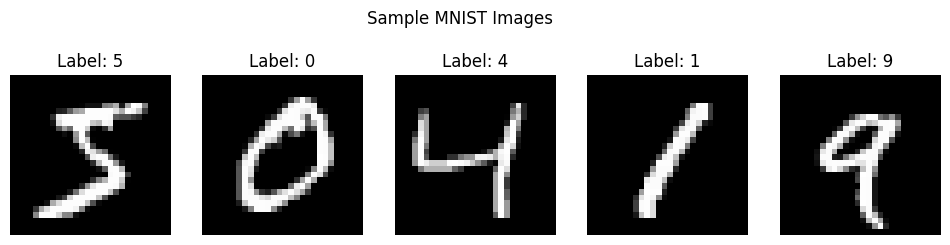

In [ ]:
# task 3: MNIST dataset

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

print(f"Training data shape: {x_train.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Test data shape: {x_test.shape}")
print(f"Test labels shape: {y_test.shape}")

# Let's look at a few examples
plt.figure(figsize=(12, 3))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f'Label: {y_train[i]}')
    plt.axis('off')
plt.suptitle('Sample MNIST Images')
plt.show()

In [22]:

# Normalize pixel values to 0-1 range (originally 0-255)
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Flatten images from 28x28 to 784 pixels (feed-forward networks need flat input)
x_train_flat = x_train.reshape(60000, 28*28)  # 60000 samples, 784 features each
x_test_flat = x_test.reshape(10000, 28*28)    # 10000 samples, 784 features each

print(f"Flattened training data shape: {x_train_flat.shape}")
print(f"Flattened test data shape: {x_test_flat.shape}")
print(f"Pixel value range: {x_train_flat.min()} to {x_train_flat.max()}")


Flattened training data shape: (60000, 784)
Flattened test data shape: (10000, 784)
Pixel value range: 0.0 to 1.0


In [ ]:
# task 4: model building
from tensorflow.keras import layers



# Create a simple feed-forward neural network
model = keras.Sequential([
    layers.Input(shape=(784,)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),             
    layers.Dense(32, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.summary()

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


Model Architecture:


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 111,146 (434.16 KB)

 Trainable params: 111,146 (434.16 KB)

 Non-trainable params: 0 (0.00 B)

In [26]:

# Train the model
history = model.fit(
    x_train_flat, y_train,              # Training data and labels
    batch_size=128,                     # Process 128 samples at a time
    epochs=10,                          # Train for 10 epochs
    validation_data=(x_test_flat, y_test),  # Use test data for validation
    verbose=1                           # Show progress
)


Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7852 - loss: 0.6972 - val_accuracy: 0.9499 - val_loss: 0.1718
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9566 - loss: 0.1446 - val_accuracy: 0.9621 - val_loss: 0.1270
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9711 - loss: 0.0951 - val_accuracy: 0.9658 - val_loss: 0.1134
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9784 - loss: 0.0723 - val_accuracy: 0.9723 - val_loss: 0.0862
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9834 - loss: 0.0537 - val_accuracy: 0.9743 - val_loss: 0.0847
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9876 - loss: 0.0412 - val_accuracy: 0.9768 - val_loss: 0.0776
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9894 - loss: 0.0350 - val_accuracy: 0.9733 - val_loss: 0.0927
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9910 - loss: 0.0294 - val_accuracy: 0.

In [ ]:

# Evaluate on test data
test_loss, test_accuracy = model.evaluate(x_test_flat, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")

# Make predictions on a few test samples
predictions = model.predict(x_test_flat[:5])
predicted_classes = np.argmax(predictions, axis=1)

print("\n=== Sample Predictions ===")
plt.figure(figsize=(12, 4))
for i in range(5):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_test[i], cmap='gray')
    plt.title(f'True: {y_test[i]}')
    plt.axis('off')
    
    plt.subplot(2, 5, i+6)
    plt.bar(range(10), predictions[i])
    plt.title(f'Predicted: {predicted_classes[i]}')
    plt.xlabel('Digit')
    plt.ylabel('Probability')

plt.tight_layout()
plt.show()
